<a href="https://colab.research.google.com/github/Rithvik26/Main_project_Wild_Animals/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!unzip -u "/content/drive/MyDrive/Wild_Animals.zip" -d "/content/drive/MyDrive/Wild_Animals"

Archive:  /content/drive/MyDrive/Wild_Animals.zip

n
N


In [3]:
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import time
from tqdm import tqdm
from sklearn.metrics import f1_score
from IPython.display import YouTubeVideo
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
print ('Modules loaded')

Modules loaded


In [4]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [5]:
data = []
lab = []
img_paths = []
classes=[ 'cheetah', 'fox', 'hyena','lion','tiger', 'wolf']

In [6]:
def make_dataframes(sdir):
    bad_images=[]
    classes=[ 'cheetah', 'fox', 'hyena','lion','tiger', 'wolf']
    filepaths=[]
    labels=[]
    data=[]
    classlist=sorted(os.listdir(sdir) )     
    for klass in classlist:
        classpath=os.path.join(sdir, klass)
        subdir=os.listdir(classpath)[0]
        subpath=os.path.join(classpath,  subdir)
        if os.path.isdir(subpath):
            flist=sorted(os.listdir(subpath)) 
            for i in range (len(classes)):
                if classes[i] in classpath:
                    klass=classes[i]
            desc=f'{klass:10s}-{subdir:17s}'
            for f in tqdm(flist, ncols=130,desc=desc, unit='files', colour='blue'):
                fpath=os.path.join(subpath,f)
                try: # test to ensure image files are valid image files
                    img=cv2.imread(fpath)
                    shape=img.shape
                    
                    filepaths.append(fpath) # only add valid image files to the dataframe
                    labels.append(klass)
                except:
                    bad_images.append(fpath)                    
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    df=pd.concat([Fseries, Lseries], axis=1) 
    train_df, dummy_df=train_test_split(df, train_size=.7, shuffle=True, random_state=123, stratify=df['labels']) 
    valid_df, test_df=train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels']) 
    classes=sorted(train_df['labels'].unique())
    class_count=len(classes)
    print('number of classes in processed dataset= ', class_count)    
    counts=list(train_df['labels'].value_counts()) 
    print(counts[0], type(counts[0]))
    print('the maximum files in any class in train_df is ', max(counts), '  the minimum files in any class in train_df is ', min(counts))
    print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df)) 
    sample_df=train_df.sample(n=50, replace=False)
    # calculate the average image height and with
    ht=0
    wt=0
    count=0
    for i in range(len(sample_df)):
        fpath=sample_df['filepaths'].iloc[i]
        try:
            img=cv2.imread(fpath)
            h=img.shape[0]
            w=img.shape[1]
            wt +=w
            ht +=h
            count +=1
        except:
            pass
    have=int(ht/count)
    wave=int(wt/count)
    aspect_ratio=have/wave    
    print('average image height= ', have, '  average image width= ', wave, ' aspect ratio h/w= ', aspect_ratio) 
    if len(bad_images)>0:
        print_in_color('Below is a list of invalid image files')
        for f in bad_images:
            print (f)
    return train_df, test_df, valid_df, classes, class_count

sdir=r'/content/drive/MyDrive/Wild_Animals'
train_df, test_df, valid_df, classes, class_count=make_dataframes(sdir)
    

wolf      -wolf-resize-512  : 100%|██████████████████████████████████████████████████████████| 526/526 [00:12<00:00, 43.36files/s]


number of classes in processed dataset=  6
1105 <class 'int'>
the maximum files in any class in train_df is  1105   the minimum files in any class in train_df is  525
train_df length:  4353   test_df length:  933   valid_df length:  933
average image height=  304   average image width=  304  aspect ratio h/w=  1.0
Below is a list of invalid image files

/content/drive/MyDrive/Wild_Animals/cheetah-resize-224/resize-224/00000244_224resized.png
/content/drive/MyDrive/Wild_Animals/cheetah-resize-300/resize-300/00000244_300resized.png
/content/drive/MyDrive/Wild_Animals/cheetah-resize-512/resize-512/00000244_512resized.png
/content/drive/MyDrive/Wild_Animals/hyena-resize-224/resize-224/00000224_224resized.png
/content/drive/MyDrive/Wild_Animals/hyena-resize-300/resize-300/00000224_300resized.png
/content/drive/MyDrive/Wild_Animals/hyena-resize-512/resize-512/00000224_512resized.png


In [7]:
def trim(df, max_samples, min_samples, column):
    df=df.copy()
    classes=df[column].unique()
    class_count=len(classes)
    length=len(df)
    print ('dataframe initially is of length ',length, ' with ', class_count, ' classes')
    groups=df.groupby(column)    
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby(column)
    for label in df[column].unique(): 
        group=groups.get_group(label)
        count=len(group)    
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group        
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    classes=trimmed_df[column].unique()# return this in case some classes have less than min_samples
    class_count=len(classes) # return this in case some classes have less than min_samples
    length=len(trimmed_df)
    print ('the trimmed dataframe now is of length ',length, ' with ', class_count, ' classes')
    return trimmed_df, classes, class_count

max_samples=500
min_samples=500
column='labels'
train_df, classes, class_count=trim(train_df, max_samples, min_samples, column)

dataframe initially is of length  4353  with  6  classes
after trimming, the maximum samples in any class is now  500  and the minimum samples in any class is  500
the trimmed dataframe now is of length  3000  with  6  classes


In [8]:
img_size=(224,224)
working_dir=r'/content/drive/MyDrive/Wild_Animals'

In [9]:
def balance(df, n, working_dir, img_size):
    df=df.copy()
    print('Initial length of dataframe is ', len(df))
    aug_dir=os.path.join(working_dir, 'aug')# directory to store augmented images
    if os.path.isdir(aug_dir):# start with an empty directory
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)        
    for label in df['labels'].unique():    
        dir_path=os.path.join(aug_dir,label)    
        os.mkdir(dir_path) # make class directories within aug directory
    # create and store the augmented images  
    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2)
    groups=df.groupby('labels') # group by class
    for label in df['labels'].unique():  # for every class               
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
        sample_count=len(group)   # determine how many samples there are in this class  
        if sample_count< n: # if the class has less than target number of images
            aug_img_count=0
            delta=n - sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images
            msg='{0:40s} for class {1:^30s} creating {2:^5s} augmented images'.format(' ', label, str(delta))
            print(msg, '\r', end='') # prints over on the same line
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=img_size,
                                            class_mode=None, batch_size=1, shuffle=False, 
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)            
                aug_img_count += len(images)
            total +=aug_img_count
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    aug_fpaths=[]
    aug_labels=[]
    classlist=os.listdir(aug_dir)
    for klass in classlist:
        classpath=os.path.join(aug_dir, klass)     
        flist=os.listdir(classpath)    
        for f in flist:        
            fpath=os.path.join(classpath,f)         
            aug_fpaths.append(fpath)
            aug_labels.append(klass)
    Fseries=pd.Series(aug_fpaths, name='filepaths')
    Lseries=pd.Series(aug_labels, name='labels')
    aug_df=pd.concat([Fseries, Lseries], axis=1)         
    df=pd.concat([df,aug_df], axis=0).reset_index(drop=True)
    print('Length of augmented dataframe is now ', len(df))
    return df 

In [10]:
def make_gens(batch_size, train_df, test_df, valid_df, img_size):
    trgen=ImageDataGenerator()
    t_and_v_gen=ImageDataGenerator()
    msg='{0:70s} for train generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
    msg='{0:70s} for valid generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
    # for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
    # this insures that we go through all the sample in the test set exactly once.
    length=len(test_df)
    test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
    test_steps=int(length/test_batch_size)
    msg='{0:70s} for test generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
    # from the generator we can get information we will need later
    classes=list(train_gen.class_indices.keys())
    class_indices=list(train_gen.class_indices.values())
    class_count=len(classes)
    labels=test_gen.labels
    print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)
    return train_gen, test_gen, valid_gen, test_steps


batch_size=20
train_gen, test_gen, valid_gen, test_steps =make_gens(batch_size, train_df, test_df, valid_df, img_size)

Found 3000 validated image filenames belonging to 6 classes.
Found 933 validated image filenames belonging to 6 classes.
Found 933 validated image filenames belonging to 6 classes.
test batch size:  3   test steps:  311  number of classes :  6


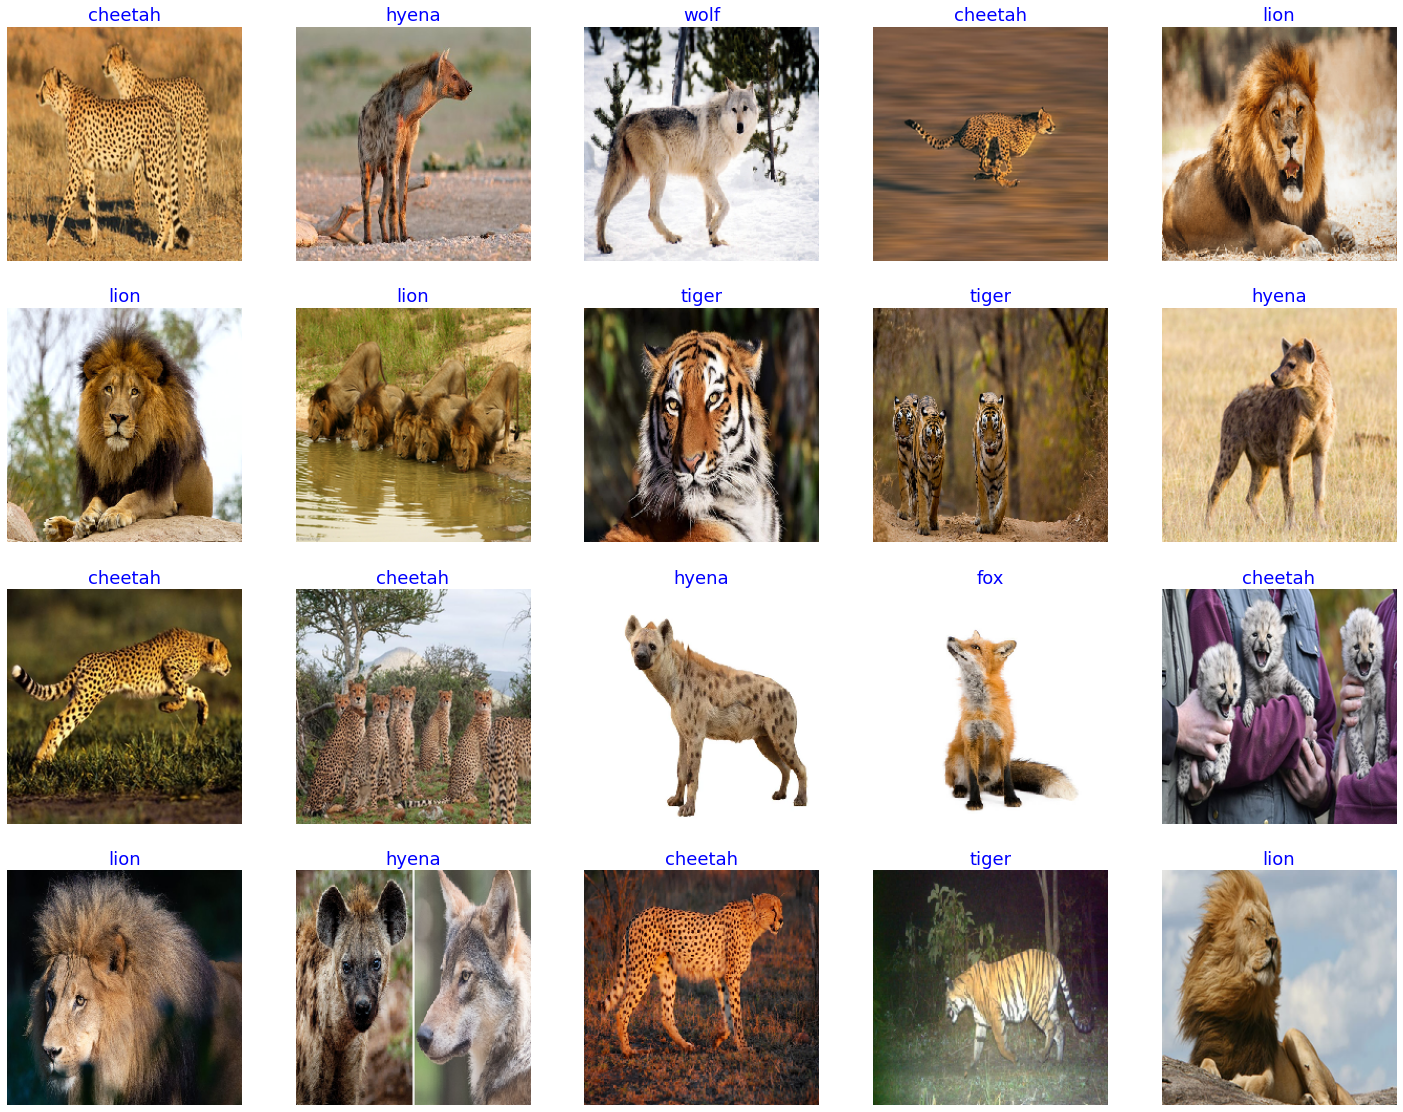

In [11]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(25, 25))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i] /255       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=18)
        plt.axis('off')
    plt.show()
    
show_image_samples(train_gen)

In [12]:
def make_dataframes(sdir):
    bad_images=[]
    classes=[ 'cheetah', 'fox', 'hyena','lion','tiger', 'wolf']
    filepaths=[]
    labels=[]
    data=[]
    classlist=sorted(os.listdir(sdir) )     
    for klass in classlist:
        classpath=os.path.join(sdir, klass)
        subdir=os.listdir(classpath)[0]
        subpath=os.path.join(classpath,  subdir)
        if os.path.isdir(subpath):
            flist=sorted(os.listdir(subpath)) 
            for i in range (len(classes)):
                if classes[i] in classpath:
                    klass=classes[i]
            desc=f'{klass:10s}-{subdir:17s}'
            for f in tqdm(flist, ncols=130,desc=desc, unit='files', colour='blue'):
                fpath=os.path.join(subpath,f)
                try: # test to ensure image files are valid image files
                    img=cv2.imread(fpath)
                    shape=img.shape
                    
                    filepaths.append(fpath) # only add valid image files to the dataframe
                    labels.append(klass)
                except:
                    bad_images.append(fpath)                    
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    df=pd.concat([Fseries, Lseries], axis=1) 
    train_df, dummy_df=train_test_split(df, train_size=.7, shuffle=True, random_state=123, stratify=df['labels']) 
    valid_df, test_df=train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels']) 
    classes=sorted(train_df['labels'].unique())
    class_count=len(classes)
    print('number of classes in processed dataset= ', class_count)    
    counts=list(train_df['labels'].value_counts()) 
    print(counts[0], type(counts[0]))
    print('the maximum files in any class in train_df is ', max(counts), '  the minimum files in any class in train_df is ', min(counts))
    print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df)) 
    sample_df=train_df.sample(n=50, replace=False)
    # calculate the average image height and with
    ht=0
    wt=0
    count=0
    for i in range(len(sample_df)):
        fpath=sample_df['filepaths'].iloc[i]
        try:
            img=cv2.imread(fpath)
            h=img.shape[0]
            w=img.shape[1]
            wt +=w
            ht +=h
            count +=1
        except:
            pass
    have=int(ht/count)
    wave=int(wt/count)
    aspect_ratio=have/wave    
    print('average image height= ', have, '  average image width= ', wave, ' aspect ratio h/w= ', aspect_ratio) 
    if len(bad_images)>0:
        print_in_color('Below is a list of invalid image files')
        for f in bad_images:
            print (f)
    return train_df, test_df, valid_df, classes, class_count

sdir=r'/content/drive/MyDrive/Wild_Animals'
train_df, test_df, valid_df, classes, class_count=make_dataframes(sdir)

wolf      -wolf-resize-512  : 100%|██████████████████████████████████████████████████████████| 526/526 [00:06<00:00, 78.42files/s]


number of classes in processed dataset=  6
1105 <class 'int'>
the maximum files in any class in train_df is  1105   the minimum files in any class in train_df is  525
train_df length:  4353   test_df length:  933   valid_df length:  933
average image height=  351   average image width=  351  aspect ratio h/w=  1.0
Below is a list of invalid image files

/content/drive/MyDrive/Wild_Animals/cheetah-resize-224/resize-224/00000244_224resized.png
/content/drive/MyDrive/Wild_Animals/cheetah-resize-300/resize-300/00000244_300resized.png
/content/drive/MyDrive/Wild_Animals/cheetah-resize-512/resize-512/00000244_512resized.png
/content/drive/MyDrive/Wild_Animals/hyena-resize-224/resize-224/00000224_224resized.png
/content/drive/MyDrive/Wild_Animals/hyena-resize-300/resize-300/00000224_300resized.png
/content/drive/MyDrive/Wild_Animals/hyena-resize-512/resize-512/00000224_512resized.png


In [13]:
d={'hyena':0, 'tiger':1, 'fox':3, 'wolf':4, 'cheetah':2, 'lion':5}

In [14]:
images=[]
labels=[]
IMAGE_SIZE = (150, 150)
for ind in train_df.index:
  img_path = train_df['filepaths'][ind]
  image = cv2.imread(img_path)
  image = cv2.resize(image, IMAGE_SIZE) 
  images.append(image)
  labels.append(train_df['labels'][ind])
train_images = np.array(images, dtype = 'float32')
train_labels = np.array(labels)   


In [15]:
images=[]
labels=[]
IMAGE_SIZE = (150, 150)
for ind in test_df.index:
  img_path = test_df['filepaths'][ind]
  image = cv2.imread(img_path)
  image = cv2.resize(image, IMAGE_SIZE) 
  images.append(image)
  labels.append(test_df['labels'][ind])
test_images = np.array(images, dtype = 'float32')
test_labels = np.array(labels)   


In [16]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 4353
Number of testing examples: 933
Each image is of size: (150, 150)


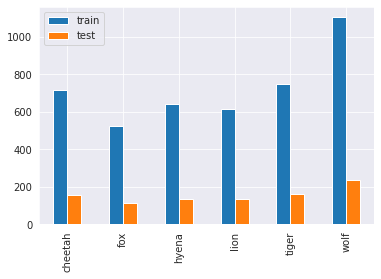

In [17]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=classes
            ).plot.bar()
plt.show()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
#history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.4)


Epoch 1/20


UnimplementedError: ignored

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

vgg = VGG16(weights="imagenet",
            include_top=False,
            input_tensor=Input(shape=(150, 150, 3)))

58889256/58889256 [==============================] - 0s 0us/step


In [22]:
train_images[0].shape

(150, 150, 3)

In [24]:
lr = 0.0001
epochs = 20
batch_size = 32
losses = {
    "class_label": "categorical_crossentropy",
}


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [28]:
trainTargets = {
    "class_label": train_labels,
}
testTargets = {
    "class_label": test_labels,
}

In [36]:
#importing all the required packages.
import imutils
import os
import cv2
import datetime
import numpy as np
import random

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from time import time
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from  tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import LabelBinarizer

import pickle

In [37]:

layer_dict = dict([(layer.name, layer) for layer in vgg.layers])
outputa = layer_dict['block1_pool'].output
m1 = Model(inputs=vgg.input, outputs=vgg,output)



# flatten the max-pooling 
# output of VGG
flatten = m1.output
flatten = Flatten()(flatten)

#And for class prediction (classification task) we'll use a softmax activation function.
softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(len(lb.classes_), 
                    activation="softmax", 
                    name="class_label")(softmaxHead)

In [38]:
m1 = Model(
    inputs=m1.input,
    outputs=(softmaxHead))

In [40]:
model_path = "model1.h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=model_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [41]:
opt = Adam(lr)
m1.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"])

print(m1.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 360000)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               184320512 
                                                                 
 dropout (Dropout)           (None, 512)               0   

In [42]:
st=time()
H1 = m1.fit(
    train_images, trainTargets,
    validation_data=(test_images, testTargets),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[model_checkpoint_callback],
    verbose=1)
d2["m1"]=(time()-st)

Epoch 1/20
  8/137 [>.............................] - ETA: 10:46 - loss: 17091.3516 - accuracy: 0.1797

KeyboardInterrupt: ignored